# 🔹 PASO 1: Carga y organización de los datos


In [ ]:
# --- 1. IMPORTAR LIBRERÍAS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import files

In [ ]:
from google.colab import files
uploaded = files.upload()

# Reemplaza con el nombre correcto de tu archivo
#df = pd.read_excel("TABLA.xlsx")
#df = pd.read_excel("TABLAUnnamed.xlsx")
df = pd.read_excel("TABLAUnnamedindices.xlsx")

Saving TABLAUnnamedindices.xlsx to TABLAUnnamedindices.xlsx


In [ ]:
# Elegimos solo las columnas válidas (sin 'Unnamed')
columnas_validas = [col for col in df.columns if not 'Unnamed' in str(col) and col not in ['VARIABLES ESCOGIDAS/ZONA', 'CIUDAD']]

# Transponemos la tabla
df_variables = df.set_index('VARIABLES ESCOGIDAS/ZONA')
df_transpuesta = df_variables[columnas_validas].transpose()

# Convertimos a numérico
df_transpuesta = df_transpuesta.apply(pd.to_numeric, errors='coerce')

In [ ]:
df_transpuesta

VARIABLES ESCOGIDAS/ZONA,Número Habitantes,Edad media de la población,Población en etapa educativa (Población de 0 a 16 años -16 no incluidos),Porcentaje de envejecimiento (Población mayor de 65 años/Población total),Porcentaje de sobre-envejecimiento (Población mayor de 80 años/ Población mayor de 65 años),Índice de dependencia (Población de 0-15 + población 65 años y más / Pob. 16-64),Personas con nacionalidad española,Personas con nacionalidad extranjera,Total hogares,Hogares con una mujer sola mayor de 65 años,...,Intervenciones de la Policía Municipal en materia de seguridad: relacionadas con la tenencia de armas,Intervenciones de la Policía Municipal en materia de seguridad: relacionadas con el patrimonio,Intervenciones de la Policía Municipal en materia de seguridad: relacionadas con la tenencia y consumo de drogas,Inspecciones y actuaciones en locales de espectáculos públicos y actividades recreativas,Expedientes instruidos por Agentes Tutores,Atestados/partes de accidentes de tráfico confeccionados,Personas detenidas e investigadas por la Policía Municipal en materia de seguridad: Total personas detenidas e investigadas,Instalaciones deportivas básicas,Centros deportivos municipales,Superficie deportiva m2
CENTRO,0.042020,44.02,0.068757,0.1587,0.3053,0.2932,0.694652,0.265977,0.052780,0.073281,...,0.636834,0.329926,0.352689,0.194338,0.226013,0.065521,0.257625,0.021739,0.037975,0.0
Palacio,0.167333,45.98,0.067730,0.1929,0.3002,0.3522,0.756165,0.209642,0.167354,0.089140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embajadores,0.334156,42.91,0.075365,0.1375,0.3103,0.2701,0.659477,0.291418,0.324156,0.068220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cortes,0.076824,44.88,0.060066,0.1737,0.2954,0.3067,0.693224,0.274998,0.079354,0.074373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Justicia,0.128869,44.12,0.068787,0.1575,0.3202,0.2915,0.710230,0.262020,0.129867,0.070850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alameda de Osuna,0.400609,46.30,0.152503,0.2658,0.2570,0.7067,0.919748,0.070692,0.402743,0.096138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aeropuerto,0.039285,42.02,0.155977,0.1488,0.3958,0.4352,0.742945,0.232940,0.037909,0.082621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Casco Histórico de Barajas,0.153693,45.15,0.106230,0.1993,0.3111,0.4376,0.776393,0.192000,0.172103,0.080640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Timón,0.249940,40.12,0.179274,0.1228,0.2959,0.4388,0.867097,0.104597,0.244087,0.048451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sube y carga tu Excel con Google Colab.

Detecta la primera fila como encabezado con nombres de barrios/distritos (algunos repetidos o combinados).

Transforma el Excel para que:

Cada fila sea un barrio o distrito.

Cada columna sea un indicador.

# 🔹 PASO 2: Limpieza de filas inútiles y separación entre barrios y distritos

In [ ]:
# --- PASO 2: Clasificar correctamente distritos y barrios ---

# Reiniciar el índice para trabajar mejor
df_transpuesta = df_transpuesta.reset_index()
df_transpuesta = df_transpuesta.rename(columns={"index": "zona"})

# Crear columnas nuevas
df_transpuesta["distrito"] = None
df_transpuesta["es_barrio"] = None

# Asignar distrito y marcar si es barrio
distrito_actual = None

for i, row in df_transpuesta.iterrows():
    zona = row["zona"]
    if zona == zona.upper():  # si está en mayúsculas, es un distrito
        distrito_actual = zona
        df_transpuesta.at[i, "distrito"] = zona
        df_transpuesta.at[i, "es_barrio"] = False
    else:  # si no, es barrio
        df_transpuesta.at[i, "distrito"] = distrito_actual
        df_transpuesta.at[i, "es_barrio"] = True

# Verificamos las primeras filas
df_transpuesta.head(10)


VARIABLES ESCOGIDAS/ZONA,zona,Número Habitantes,Edad media de la población,Población en etapa educativa (Población de 0 a 16 años -16 no incluidos),Porcentaje de envejecimiento (Población mayor de 65 años/Población total),Porcentaje de sobre-envejecimiento (Población mayor de 80 años/ Población mayor de 65 años),Índice de dependencia (Población de 0-15 + población 65 años y más / Pob. 16-64),Personas con nacionalidad española,Personas con nacionalidad extranjera,Total hogares,...,Intervenciones de la Policía Municipal en materia de seguridad: relacionadas con la tenencia y consumo de drogas,Inspecciones y actuaciones en locales de espectáculos públicos y actividades recreativas,Expedientes instruidos por Agentes Tutores,Atestados/partes de accidentes de tráfico confeccionados,Personas detenidas e investigadas por la Policía Municipal en materia de seguridad: Total personas detenidas e investigadas,Instalaciones deportivas básicas,Centros deportivos municipales,Superficie deportiva m2,distrito,es_barrio
0,CENTRO,0.042020,44.02,0.068757,0.1587,0.3053,0.2932,0.694652,0.265977,0.052780,...,0.352689,0.194338,0.226013,0.065521,0.257625,0.021739,0.037975,0.000000,CENTRO,False
1,Palacio,0.167333,45.98,0.067730,0.1929,0.3002,0.3522,0.756165,0.209642,0.167354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRO,True
2,Embajadores,0.334156,42.91,0.075365,0.1375,0.3103,0.2701,0.659477,0.291418,0.324156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRO,True
3,Cortes,0.076824,44.88,0.060066,0.1737,0.2954,0.3067,0.693224,0.274998,0.079354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRO,True
4,Justicia,0.128869,44.12,0.068787,0.1575,0.3202,0.2915,0.710230,0.262020,0.129867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRO,True
5,Universidad,0.234322,43.97,0.065242,0.1601,0.3104,0.2877,0.710064,0.252076,0.242413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRO,True
6,Sol,0.058496,43.52,0.059370,0.1575,0.2597,0.2755,0.625441,0.334352,0.056856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRO,True
7,ARGANZUELA,0.045242,45.40,0.112105,0.2087,0.2977,0.5171,0.869845,0.109365,0.049909,...,0.016905,0.048145,0.006397,0.045149,0.028571,0.035573,0.063291,0.037738,ARGANZUELA,False
8,Imperial,0.144789,47.07,0.104861,0.2347,0.3091,0.5629,0.904094,0.083422,0.146183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARGANZUELA,True
9,Acacias,0.232979,47.69,0.096093,0.2576,0.2689,0.4938,0.907827,0.081042,0.234976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARGANZUELA,True


Este paso es clave para que luego puedas hacer:

Clustering solo de barrios (df_transpuesta[df_transpuesta["es_barrio"]])

O solo de distritos (df_transpuesta[~df_transpuesta["es_barrio"]])

O un análisis conjunto.

# 🔹 PASO 3: Filtrado de columnas útiles y normalización

Este paso tiene dos objetivos:

Eliminar columnas con muchos NaN (porque no aportan valor al clustering).

Normalizar las variables con StandardScaler para que todas tengan media 0 y varianza 1.



Eso significa que solo mantuviste las columnas que tienen al menos un 70% de valores no nulos.

Este enfoque es práctico para evitar que las técnicas de clustering se estropeen por columnas muy vacías, pero también puede excluir variables importantes si faltan muchos datos (por ejemplo, indicadores policiales o judiciales). Es posible que estés perdiendo variables como:

Intervenciones policiales

Expedientes abiertos

Personas detenidas

Datos de drogas, armas o violencia

Estos sí aparecen en el informe oficial y dan valor social a la vulnerabilidad.


In [ ]:
# --- PASO 3: Filtrar columnas útiles y normalizar ---

# Fijamos un umbral de mínimo 70% de datos no nulos para mantener una columna
umbral_columnas = 0.7

# Lista de índices que queremos mantener aunque tengan muchos NaNs
indices_vulnerabilidad = [
    "Índice de Vulnerabilidad Territorial Agregado",
    "Índice de Vulnerabilidad Bienestar Social e Igualdad",
    "Índice de Vulnerabilidad Medio Ambiente Urbano y Movilidad",
    "Índice de Vulnerabilidad Educación y Cultura",
    "Índice de Vulnerabilidad Economía y Empleo",
    "Índice de Vulnerabilidad Salud",
    "Edad media de la población"
]

# Aplicamos el filtro y forzamos mantener las columnas de los índices
columnas_validas = df_transpuesta.loc[:, (df_transpuesta.notna().mean() > umbral_columnas) |
                                       (df_transpuesta.columns.isin(indices_vulnerabilidad))]

# Excluir columnas no numéricas
columnas_numericas = columnas_validas.select_dtypes(include=[np.number])

# Eliminamos filas con demasiados NaNs (opcional, aquí bajamos a un 70% también)
umbral_filas = 0.7
df_filtrado = columnas_numericas.loc[df_transpuesta.index[columnas_numericas.notna().mean(axis=1) > umbral_filas]].copy()

# Guardamos zona, distrito y es_barrio para luego reusarlos
info_zonas = df_transpuesta.loc[df_filtrado.index, ["zona", "distrito", "es_barrio"]].reset_index(drop=True)

# Normalizamos con StandardScaler
scaler = StandardScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df_filtrado),
                              columns=df_filtrado.columns,
                              index=df_filtrado.index)

# Añadimos zona y distrito de nuevo
df_normalizado = pd.concat([info_zonas, df_normalizado.reset_index(drop=True)], axis=1)

# Mostrar las primeras filas del dataset listo para clustering
df_normalizado.head()


VARIABLES ESCOGIDAS/ZONA,zona,distrito,es_barrio,Número Habitantes,Edad media de la población,Población en etapa educativa (Población de 0 a 16 años -16 no incluidos),Porcentaje de envejecimiento (Población mayor de 65 años/Población total),Porcentaje de sobre-envejecimiento (Población mayor de 80 años/ Población mayor de 65 años),Índice de dependencia (Población de 0-15 + población 65 años y más / Pob. 16-64),Personas con nacionalidad española,...,"Población mayor/igual de 25 años con Bachiller Elemental, Graduado Escolar, ESO, Formación profesional 1º grado","Población mayor/igual de 25 años con Formación profesional 2º grado, Bachiller Superior o BUP","Población mayor/igual de 25 años con titulación media, diplomatura, arquitectura o ingeniería técnica","Población mayor/igual de 25 años con estudios superiores, licenciatura, arquitectura, ingeniería sup., estudios sup. no universitarios, doctorado, postgraduado",Índice de Vulnerabilidad Territorial Agregado,Índice de Vulnerabilidad Bienestar Social e Igualdad,Índice de Vulnerabilidad Medio Ambiente Urbano y Movilidad,Índice de Vulnerabilidad Educación y Cultura,Índice de Vulnerabilidad Economía y Empleo,Índice de Vulnerabilidad Salud
0,CENTRO,CENTRO,False,-1.203054,-0.095249,-1.683867,-0.747650,-0.573703,-1.986349,-1.458351,...,-0.640632,-0.453011,-0.055773,0.718677,1.251563,1.622713,0.433384,-0.778517,0.307814,1.057970
1,Palacio,CENTRO,True,0.265110,0.531306,-1.712619,-0.142518,-0.664225,-1.418551,-0.674570,...,-0.759732,-0.343238,0.175176,0.760855,NaN,1.068048,-0.523446,-0.935045,-0.191302,0.925836
2,Embajadores,CENTRO,True,2.219625,-0.450084,-1.498873,-1.122761,-0.484956,-2.208657,-1.906534,...,-0.310566,-0.468405,-0.274018,0.366386,NaN,1.157691,0.443180,-0.767597,0.827871,0.601506
3,Cortes,CENTRO,True,-0.795297,0.179668,-1.927147,-0.482241,-0.749422,-1.856430,-1.476549,...,-1.009364,-0.496588,0.216580,1.037395,NaN,2.793673,-0.257297,-1.026049,0.213575,2.575512
4,Justicia,CENTRO,True,-0.185529,-0.063282,-1.683022,-0.768883,-0.309237,-2.002710,-1.259857,...,-0.945307,-0.863721,-0.264613,1.172508,NaN,1.930860,0.162336,-0.316216,0.028588,0.953864


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar entre barrios y distritos
df_barrios = df_transpuesta[df_transpuesta["es_barrio"] == True].copy()
df_distritos = df_transpuesta[df_transpuesta["es_barrio"] == False].copy()

# Quitar columnas no informativas
columnas_excluidas = ["zona", "distrito", "es_barrio"]
columnas_utiles = [col for col in df_transpuesta.columns if col not in columnas_excluidas]

# Calcular % NaNs
nans_barrios = df_barrios[columnas_utiles].isna().mean() * 100
nans_distritos = df_distritos[columnas_utiles].isna().mean() * 100

# Crear tabla comparativa
df_nans = pd.DataFrame({
    "NaNs en barrios (%)": nans_barrios,
    "NaNs en distritos (%)": nans_distritos
}).sort_values("NaNs en barrios (%)", ascending=False)

# Filtrar: muchas ausencias en barrios pero no en distritos
df_filtrado = df_nans[
    (df_nans["NaNs en barrios (%)"] > 30) &
    (df_nans["NaNs en distritos (%)"] < 5)
]

# Mostrar tabla
print("Variables con muchos NaNs en barrios pero no en distritos:")
display(df_filtrado)



Variables con muchos NaNs en barrios pero no en distritos:


,NaNs en barrios (%),NaNs en distritos (%)
VARIABLES ESCOGIDAS/ZONA,,
Consumo de medicamentos,100.0,0.0
Personas con sobrepeso,100.0,0.0
Consumo de tabaco diario,100.0,0.0
Alumnado en Centros privados concertados,100.0,0.0
Alumnado en Centros públicos,100.0,0.0
Alumnado en Centros privados sin concierto,100.0,0.0
Alumnado extranjero en Centros privados concertados,100.0,0.0
Total alumnado extranjero,100.0,0.0
Renta disponible media por persona,100.0,0.0


/tmp/ipython-input-8-438631206.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


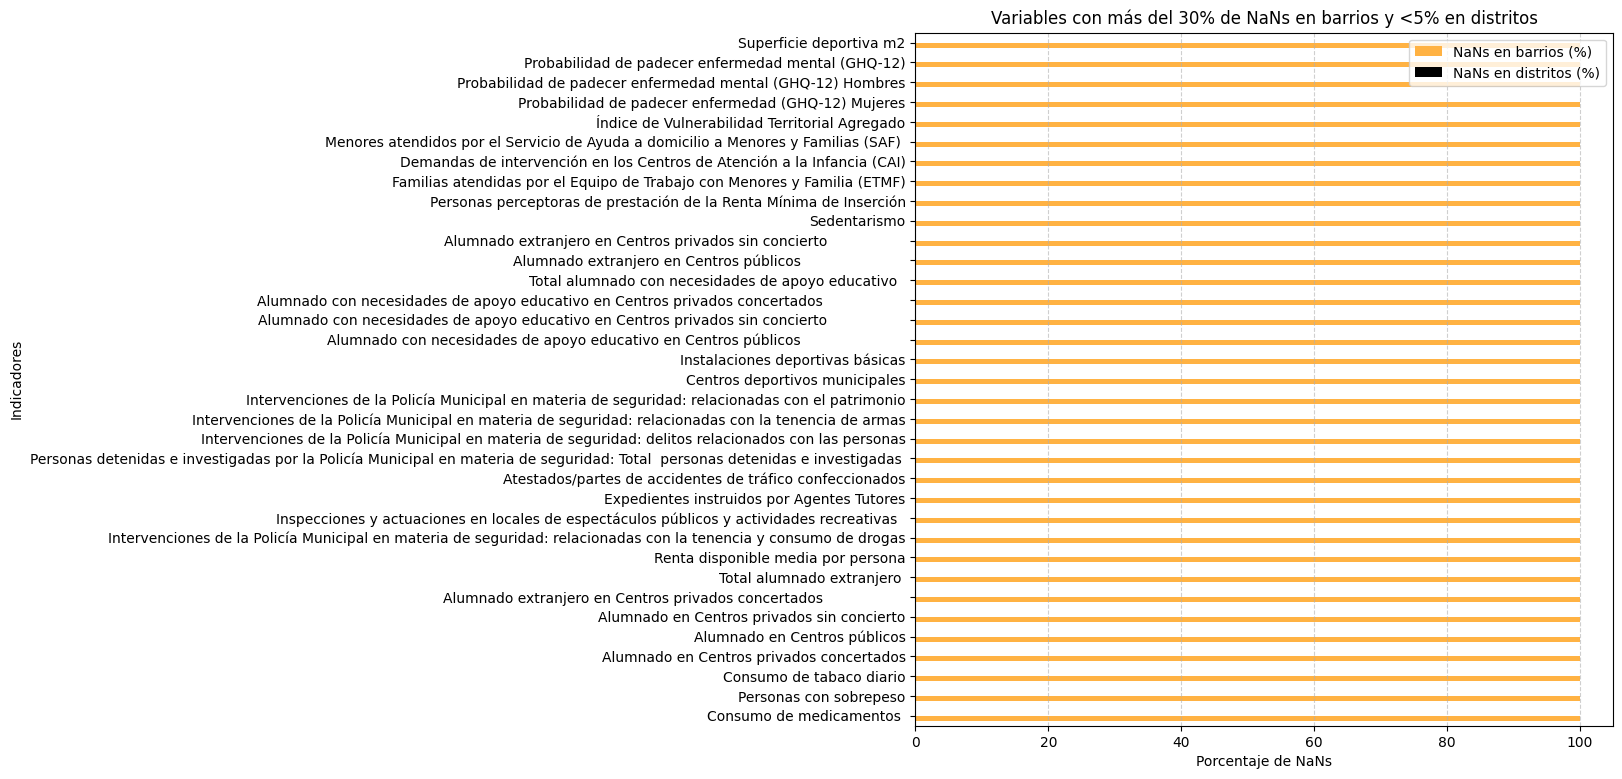

In [ ]:
# Gráfico horizontal
df_filtrado.plot(kind='barh', figsize=(9, 9), color=['#FFB243', 'black'])
plt.title("Variables con más del 30% de NaNs en barrios y <5% en distritos")
plt.xlabel("Porcentaje de NaNs")
plt.ylabel("Indicadores")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
df_normalizado.columns

Index(['zona', 'distrito', 'es_barrio', 'Número Habitantes',
       'Edad media de la población',
       'Población en etapa educativa (Población de 0 a 16 años -16 no incluidos)                            ',
       'Porcentaje de envejecimiento (Población mayor de 65 años/Población total)',
       'Porcentaje de sobre-envejecimiento (Población mayor de 80 años/ Población mayor de 65 años)',
       'Índice de dependencia (Población de 0-15 + población 65 años y más / Pob. 16-64) ',
       'Personas con nacionalidad española             ',
       'Personas con nacionalidad extranjera            ', 'Total hogares',
       'Hogares con una mujer sola mayor de 65 años                      ',
       'Hogares con un hombre solo mayor de 65 años                     ',
       'Hogares monoparentales: una mujer adulta con uno o más menores',
       'Paro registrado (número de personas registradas en SEPE en febrero) ',
       'Tasa de desempleo en hombres de 25 a 44 años',
       'Tasa de desem

💡 Este paso asegura que:

Solo usamos variables útiles.

El clustering no se sesga por escalas distintas entre indicadores.

Conservamos info importante (zona, distrito, es_barrio) para poder visualizar y agrupar después.

## 🔹 PASO 3.1: Exploración de los indicadores normalizados

# 🔹 PASO 4: Clustering (por barrios y por distritos)


Aplicaremos tres técnicas:

KMeans

DBSCAN

AgglomerativeClustering

Y lo haremos primero con los barrios (es_barrio == True). Después lo puedes repetir igual con distritos si quieres.

## 🧩 Celda PASO 4.1: KMeans por barrios

In [ ]:
# --- PASO 4.1: Clustering KMeans para barrios ---

# Filtramos solo los barrios
distritos = df_normalizado[df_normalizado["es_barrio"] == False].copy()
X_distritos = distritos.drop(['zona', 'distrito', 'es_barrio'], axis=1)
distritos

VARIABLES ESCOGIDAS/ZONA,zona,distrito,es_barrio,Número Habitantes,Edad media de la población,Población en etapa educativa (Población de 0 a 16 años -16 no incluidos),Porcentaje de envejecimiento (Población mayor de 65 años/Población total),Porcentaje de sobre-envejecimiento (Población mayor de 80 años/ Población mayor de 65 años),Índice de dependencia (Población de 0-15 + población 65 años y más / Pob. 16-64),Personas con nacionalidad española,...,"Población mayor/igual de 25 años con Bachiller Elemental, Graduado Escolar, ESO, Formación profesional 1º grado","Población mayor/igual de 25 años con Formación profesional 2º grado, Bachiller Superior o BUP","Población mayor/igual de 25 años con titulación media, diplomatura, arquitectura o ingeniería técnica","Población mayor/igual de 25 años con estudios superiores, licenciatura, arquitectura, ingeniería sup., estudios sup. no universitarios, doctorado, postgraduado",Índice de Vulnerabilidad Territorial Agregado,Índice de Vulnerabilidad Bienestar Social e Igualdad,Índice de Vulnerabilidad Medio Ambiente Urbano y Movilidad,Índice de Vulnerabilidad Educación y Cultura,Índice de Vulnerabilidad Economía y Empleo,Índice de Vulnerabilidad Salud
0,CENTRO,CENTRO,False,-1.203054,-0.095249,-1.683867,-0.747650,-0.573703,-1.986349,-1.458351,...,-0.640632,-0.453011,-0.055773,0.718677,1.251563,1.622713,0.433384,-0.778517,0.307814,1.057970
7,ARGANZUELA,ARGANZUELA,False,-1.165311,0.345897,-0.470408,0.137046,-0.708599,0.168396,0.773906,...,-0.577720,-0.071621,0.846570,0.486436,-1.087423,-0.887288,-0.126672,-0.589229,-0.739281,-0.343454
15,RETIRO,RETIRO,False,-1.289910,1.042779,-0.353140,1.189835,-0.137068,1.207755,1.032665,...,-0.934058,-0.273918,0.996617,0.837223,-1.296701,-0.483895,1.651464,-1.178936,-1.015016,-0.383495
22,SALAMANCA,SALAMANCA,False,-1.188269,0.611224,-0.714465,0.712099,0.306668,0.187643,0.014941,...,-1.086276,-0.775530,0.276363,1.173876,-0.533453,-0.366238,0.916697,-0.607429,-0.913797,-0.459572
29,CHAMARTÍN,CHAMARTÍN,False,-1.193913,0.457781,0.021958,0.674942,0.237445,0.833393,0.777042,...,-1.116297,-0.819619,0.422219,1.193610,-1.062802,-0.713604,-0.200149,-0.734835,-1.077842,-0.327438
36,TETUÁN,TETUÁN,False,-1.132632,-0.076069,-0.599256,-0.179675,0.145148,-0.739119,-0.675175,...,0.092189,-0.320762,-0.238321,0.072029,0.155932,-0.769631,0.464407,0.411818,0.269420,-0.435548
43,CHAMBERÍ,CHAMBERÍ,False,-1.214657,0.630404,-0.798890,0.745718,0.162898,0.166471,0.380034,...,-1.030681,-1.279462,0.142159,1.225457,1.140769,-0.808850,0.833423,-0.749396,-0.952191,0.961872
50,FUENCARRAL-EL PARDO,FUENCARRAL-EL PARDO,False,-0.835754,-0.181561,1.088690,0.269751,-0.527555,1.213529,0.935359,...,-0.429379,-0.238549,0.642572,0.339770,-1.185907,-0.842466,-0.231172,-0.986007,-0.788146,-0.255365
59,MONCLOA-ARAVACA,MONCLOA-ARAVACA,False,-1.271404,0.170078,0.146345,0.379453,0.003153,0.537945,0.594767,...,-0.775736,-0.789229,0.350236,0.818722,-1.345943,-1.016149,0.337047,-1.124334,-0.850971,0.265164
67,LATINA,LATINA,False,-0.847611,0.713518,-0.451801,0.664326,0.977596,0.341622,-0.354833,...,0.744318,0.756903,-0.432263,-0.883799,0.180553,-0.058091,-0.221375,0.426379,0.485820,-0.419532


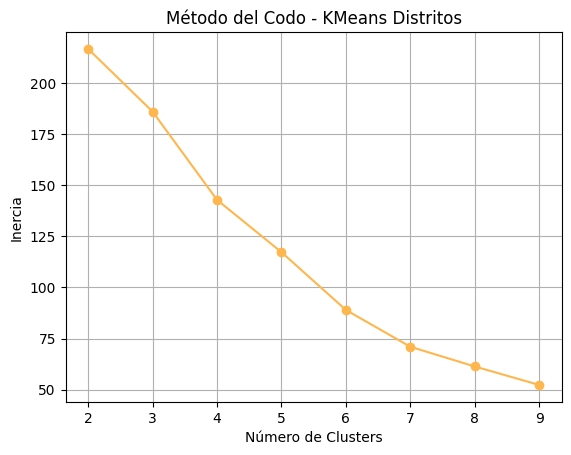

In [ ]:
# Elegimos número de clusters con método del codo (opcional)
inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_distritos)
    inertia.append(kmeans.inertia_)

# Visualizamos método del codo
plt.plot(K_range, inertia, marker='o', color='#FFB74D')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo - KMeans Distritos")
plt.grid(True)
plt.show()

🔎 Aquí decides cuántos clusters quieres. Por defecto suelen elegirse entre 3 y 6.


## 🧩 Celda PASO 4.2: Aplicar KMeans con k óptimo

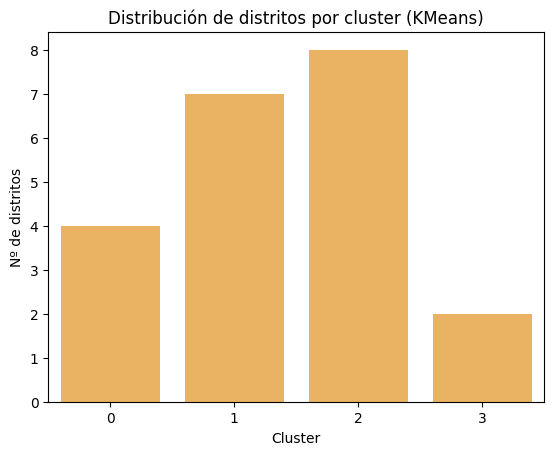


Cluster 0:
['CARABANCHEL' 'USERA' 'PUENTE DE VALLECAS' 'VILLAVERDE']

Cluster 1:
['ARGANZUELA' 'RETIRO' 'SALAMANCA' 'CHAMARTÍN' 'CHAMBERÍ'
 'FUENCARRAL-EL PARDO' 'MONCLOA-ARAVACA']

Cluster 2:
['CENTRO' 'TETUÁN' 'LATINA' 'MORATALAZ' 'CIUDAD LINEAL'
 'VILLA DE VALLECAS' 'VICÁLVARO' 'SAN BLAS-CANILLEJAS']

Cluster 3:
['HORTALEZA' 'BARAJAS']


In [ ]:
# --- Clustering definitivo con KMeans usando k=4 (puedes cambiarlo por 5 si lo prefieres) ---
k4 = 4
kmeans_final_4 = KMeans(n_clusters=k4, random_state=0)
distritos["cluster_kmeans_4"] = kmeans_final_4.fit_predict(X_distritos)

# Visualizar cantidad de distritos por cluster
sns.countplot(x="cluster_kmeans_4", data=distritos, color='#FFB74D')
plt.title("Distribución de distritos por cluster (KMeans)")
plt.xlabel("Cluster")
plt.ylabel("Nº de distritos")
plt.show()

# Mostrar algunos barrios de cada cluster como ejemplo
for i in range(k4):
    print(f"\nCluster {i}:")
    print(distritos[distritos["cluster_kmeans_4"] == i]["zona"].values)


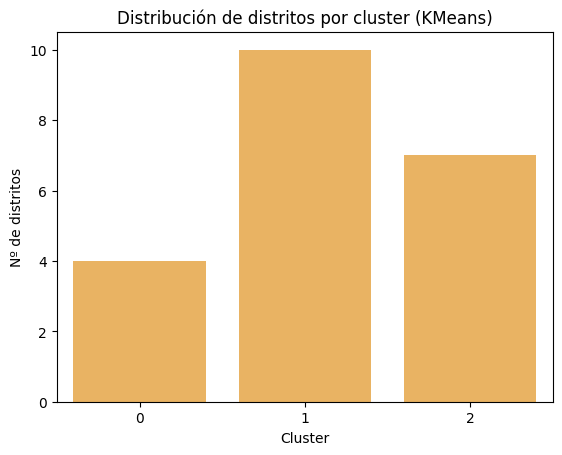


Cluster 0:
['CARABANCHEL' 'USERA' 'PUENTE DE VALLECAS' 'VILLAVERDE']

Cluster 1:
['ARGANZUELA' 'RETIRO' 'SALAMANCA' 'CHAMARTÍN' 'CHAMBERÍ'
 'FUENCARRAL-EL PARDO' 'MONCLOA-ARAVACA' 'CIUDAD LINEAL' 'HORTALEZA'
 'BARAJAS']

Cluster 2:
['CENTRO' 'TETUÁN' 'LATINA' 'MORATALAZ' 'VILLA DE VALLECAS' 'VICÁLVARO'
 'SAN BLAS-CANILLEJAS']


In [ ]:
# --- Clustering definitivo con KMeans usando k=3
k3 = 3
kmeans_final_3 = KMeans(n_clusters=k3, random_state=0)
distritos["cluster_kmeans_3"] = kmeans_final_3.fit_predict(X_distritos)

# Visualizar cantidad de distritos por cluster
sns.countplot(x="cluster_kmeans_3", data=distritos, color='#FFB74D')
plt.title("Distribución de distritos por cluster (KMeans)")
plt.xlabel("Cluster")
plt.ylabel("Nº de distritos")
plt.show()

# Mostrar algunos barrios de cada cluster como ejemplo
for i in range(k3):
    print(f"\nCluster {i}:")
    print(distritos[distritos["cluster_kmeans_3"] == i]["zona"].values)


## 🧩 Celda PASO 4.3: DBSCAN

Este gráfico te muestra la distancia al vecino más cercano (k-distance graph) y te ayuda a decidir el eps ideal (se busca el “codo”).

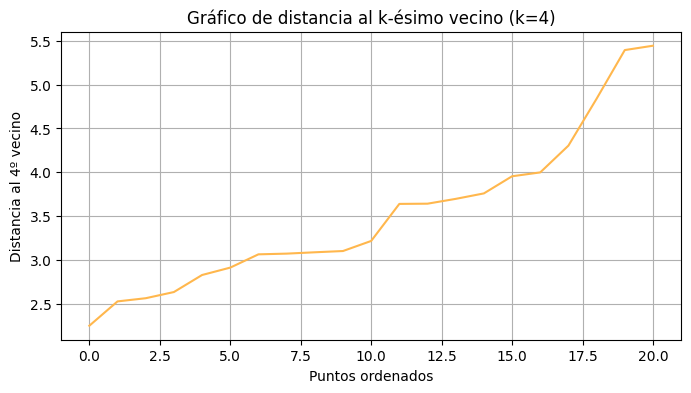

In [ ]:
# --- k-distance graph para afinar eps en DBSCAN ---
from sklearn.neighbors import NearestNeighbors

# Definimos vecinos
vecinos = NearestNeighbors(n_neighbors=4)  # 4 = min_samples habitual
vecinos_fit = vecinos.fit(X_distritos)
distancias, indices = vecinos_fit.kneighbors(X_distritos)

# Ordenamos las distancias al 4º vecino (por eso [:, -1])
dist_ordenadas = np.sort(distancias[:, -1])

# Mostramos gráfico para detectar el "codo"
plt.figure(figsize=(8, 4))
plt.plot(dist_ordenadas, color='#FFB74D')
plt.title("Gráfico de distancia al k-ésimo vecino (k=4)")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 4º vecino")
plt.grid(True)
plt.show()

🧠 ¿Cómo usarlo?

Busca el punto donde la curva sube bruscamente (el “codo”).

Ese valor del eje Y será un buen eps.


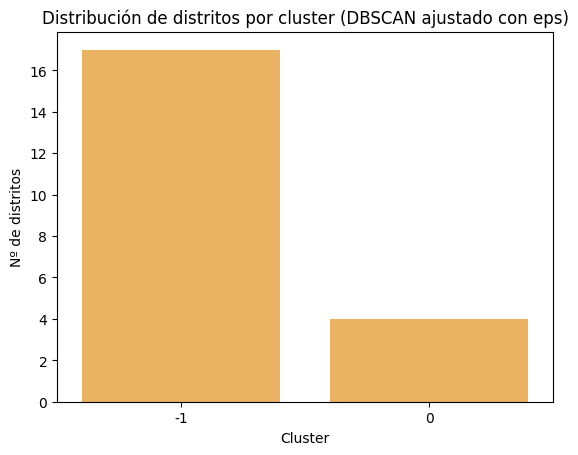


Cluster -1:
['CENTRO' 'ARGANZUELA' 'RETIRO' 'SALAMANCA' 'CHAMARTÍN' 'TETUÁN'
 'CHAMBERÍ' 'FUENCARRAL-EL PARDO' 'MONCLOA-ARAVACA' 'LATINA' 'MORATALAZ'
 'CIUDAD LINEAL' 'HORTALEZA' 'VILLA DE VALLECAS' 'VICÁLVARO'
 'SAN BLAS-CANILLEJAS' 'BARAJAS']

Cluster 0:
['CARABANCHEL' 'USERA' 'PUENTE DE VALLECAS' 'VILLAVERDE']


In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN con valor óptimo de eps según el gráfico
dbscan = DBSCAN(eps=2.5, min_samples=4)
distritos["cluster_dbscan"] = dbscan.fit_predict(X_distritos)

# Visualizamos
sns.countplot(x="cluster_dbscan", data=distritos, color='#FFB74D')
plt.title("Distribución de distritos por cluster (DBSCAN ajustado con eps)")
plt.xlabel("Cluster")
plt.ylabel("Nº de distritos")
plt.show()

# Ver qué hay en cada cluster
for label in sorted(distritos["cluster_dbscan"].unique()):
    print(f"\nCluster {label}:")
    print(distritos[distritos["cluster_dbscan"] == label]["zona"].values)


🔧 Puedes ajustar eps y min_samples si salen muchos -1 (ruido).

A pesar de probar distintos valores de eps y min_samples, el modelo DBSCAN sigue clasificando una parte considerable de los barrios como ruido (-1). Esto indica que la densidad de los datos no se ajusta bien a esta técnica, por lo que se descarta como opción principal para construir un ranking de vulnerabilidad.

## 🧩 Celda PASO 4.4: Agglomerative Clustering

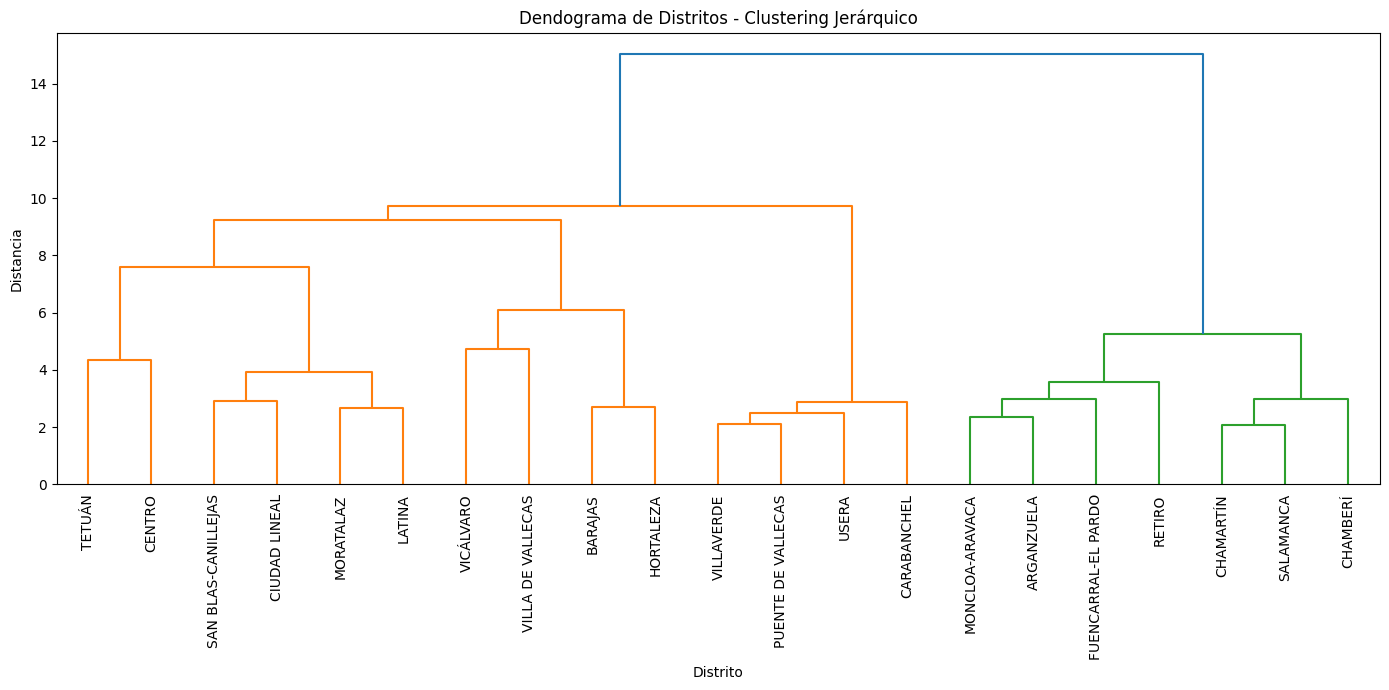

In [ ]:
# 📈 Dendograma para visualización jerárquica
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

# Calculamos las distancias y el linkage
linked = linkage(X_distritos, method='ward')  # 'ward' minimiza la varianza dentro de los clusters

# Etiquetas para los distritos
etiquetas = distritos["zona"].values

# Plot del dendrograma
plt.figure(figsize=(14, 7))
dendrogram(linked,
           labels=etiquetas,
           orientation='top',
           distance_sort='descending',
           leaf_rotation=90)
plt.title("Dendograma de Distritos - Clustering Jerárquico")
plt.xlabel("Distrito")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

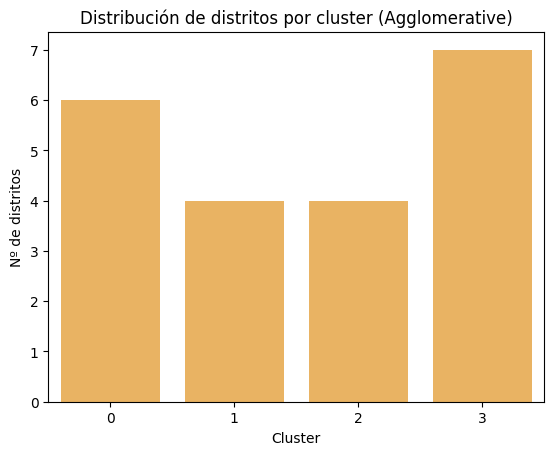


Cluster 0:
['CENTRO' 'TETUÁN' 'LATINA' 'MORATALAZ' 'CIUDAD LINEAL'
 'SAN BLAS-CANILLEJAS']

Cluster 1:
['HORTALEZA' 'VILLA DE VALLECAS' 'VICÁLVARO' 'BARAJAS']

Cluster 2:
['CARABANCHEL' 'USERA' 'PUENTE DE VALLECAS' 'VILLAVERDE']

Cluster 3:
['ARGANZUELA' 'RETIRO' 'SALAMANCA' 'CHAMARTÍN' 'CHAMBERÍ'
 'FUENCARRAL-EL PARDO' 'MONCLOA-ARAVACA']


In [ ]:
# --- Agglomerative Clustering para distritos ---
agg_4 = AgglomerativeClustering(n_clusters=4)  # cambia 4 por el nº que quieras probar
distritos["cluster_agglom_4"] = agg_4.fit_predict(X_distritos)

# Visualizamos resultados
sns.countplot(x="cluster_agglom_4", data=distritos, color='#FFB74D')
plt.title("Distribución de distritos por cluster (Agglomerative)")
plt.xlabel("Cluster")
plt.ylabel("Nº de distritos")
plt.show()

# Mostrar contenido de cada cluster
for i in sorted(distritos["cluster_agglom_4"].unique()):
    print(f"\nCluster {i}:")
    print(distritos[distritos["cluster_agglom_4"] == i]["zona"].values)


In [ ]:
for i in sorted(distritos["cluster_agglom_4"].unique()):
    print(f"\nCluster {i}:")
    print(distritos[distritos["cluster_agglom_4"] == i]["zona"].nunique())


Cluster 0:
6

Cluster 1:
4

Cluster 2:
4

Cluster 3:
7


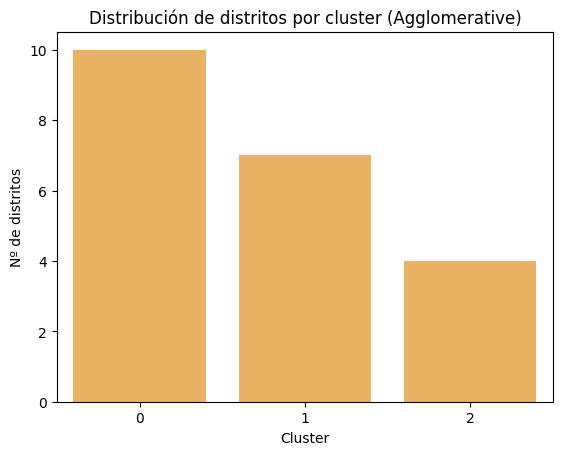


Cluster 0:
['CENTRO' 'TETUÁN' 'LATINA' 'MORATALAZ' 'CIUDAD LINEAL' 'HORTALEZA'
 'VILLA DE VALLECAS' 'VICÁLVARO' 'SAN BLAS-CANILLEJAS' 'BARAJAS']

Cluster 1:
['ARGANZUELA' 'RETIRO' 'SALAMANCA' 'CHAMARTÍN' 'CHAMBERÍ'
 'FUENCARRAL-EL PARDO' 'MONCLOA-ARAVACA']

Cluster 2:
['CARABANCHEL' 'USERA' 'PUENTE DE VALLECAS' 'VILLAVERDE']


In [ ]:
# --- Agglomerative Clustering para distritos ---
agg_3 = AgglomerativeClustering(n_clusters=3)
distritos["cluster_agglom_3"] = agg_3.fit_predict(X_distritos)

# Visualizamos resultados
sns.countplot(x="cluster_agglom_3", data=distritos, color='#FFB74D')
plt.title("Distribución de distritos por cluster (Agglomerative)")
plt.xlabel("Cluster")
plt.ylabel("Nº de distritos")
plt.show()

# Mostrar contenido de cada cluster
for i in sorted(distritos["cluster_agglom_3"].unique()):
    print(f"\nCluster {i}:")
    print(distritos[distritos["cluster_agglom_3"] == i]["zona"].values)


In [ ]:
for i in sorted(distritos["cluster_agglom_3"].unique()):
    print(f"\nCluster {i}:")
    print(distritos[distritos["cluster_agglom_3"] == i]["zona"].nunique())



Cluster 0:
10

Cluster 1:
7

Cluster 2:
4


# 🔹 PASO 5: Función para generar ranking desde cualquier modelo

## 🧩 Celda: Función generar_ranking por modelo

In [ ]:
def etiquetar_vulnerabilidad(valor):
    if valor == 1:
        return "Muy vulnerable"
    elif valor == 2:
        return "Vulnerable"
    elif valor == 3:
        return "Poco vulnerable"
    elif valor == 4:
        return "Muy poco vulnerable"

def generar_ranking(df, X_base, nombre_columna_cluster):
    temp = X_base.copy()
    temp[nombre_columna_cluster] = df[nombre_columna_cluster].values
    temp = temp[temp[nombre_columna_cluster] != -1]

    media_por_cluster = temp.groupby(nombre_columna_cluster).mean().mean(axis=1).sort_values(ascending=False)
    ranking_clusters = {cluster: rank+1 for rank, cluster in enumerate(media_por_cluster.index)}

    col_ranking = f"ranking_{nombre_columna_cluster}"
    col_categoria = f"categoria_{nombre_columna_cluster}"

    df[col_ranking] = df[nombre_columna_cluster].map(ranking_clusters)
    df[col_categoria] = df[col_ranking].map(etiquetar_vulnerabilidad)

    resultado = df[["zona", "distrito", nombre_columna_cluster, col_ranking, col_categoria]].sort_values(col_ranking)
    return resultado

## 🧩 Celda: Aplicar a los tres modelos

In [ ]:
# Aplicamos la función a cada modelo
ranking_kmeans_4 = generar_ranking(distritos, X_distritos, "cluster_kmeans_4")
ranking_kmeans_3 = generar_ranking(distritos, X_distritos, "cluster_kmeans_3")
ranking_dbscan = generar_ranking(distritos, X_distritos, "cluster_dbscan")
ranking_agglom_4 = generar_ranking(distritos, X_distritos, "cluster_agglom_4")
ranking_agglom_3 = generar_ranking(distritos, X_distritos, "cluster_agglom_3")


# Visualizamos los primeros de cada ranking
# print("🏅 Top distritos más vulnerables según KMeans k=4:")
# display(ranking_kmeans_4)

# print("🏅 Top distritos más vulnerables según KMeans k=3:")
# display(ranking_kmeans_3)

# print("🏅 Top distritos más vulnerables según DBSCAN:")
# display(ranking_dbscan)

print("🏅 Top distritos más vulnerables según Agglomerative k=4:")
display(ranking_agglom_4)

# print("🏅 Top distritos más vulnerables según Agglomerative k=3:")
# display(ranking_agglom_3)

🏅 Top distritos más vulnerables según Agglomerative k=4:


VARIABLES ESCOGIDAS/ZONA,zona,distrito,cluster_agglom_4,ranking_cluster_agglom_4,categoria_cluster_agglom_4
75,CARABANCHEL,CARABANCHEL,2,1,Muy vulnerable
91,PUENTE DE VALLECAS,PUENTE DE VALLECAS,2,1,Muy vulnerable
83,USERA,USERA,2,1,Muy vulnerable
122,VILLAVERDE,VILLAVERDE,2,1,Muy vulnerable
67,LATINA,LATINA,0,2,Vulnerable
36,TETUÁN,TETUÁN,0,2,Vulnerable
98,MORATALAZ,MORATALAZ,0,2,Vulnerable
0,CENTRO,CENTRO,0,2,Vulnerable
137,SAN BLAS-CANILLEJAS,SAN BLAS-CANILLEJAS,0,2,Vulnerable
105,CIUDAD LINEAL,CIUDAD LINEAL,0,2,Vulnerable


In [ ]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=ranking_agglom_4)

## 🧩 Celda: PCA + visualización por modelo

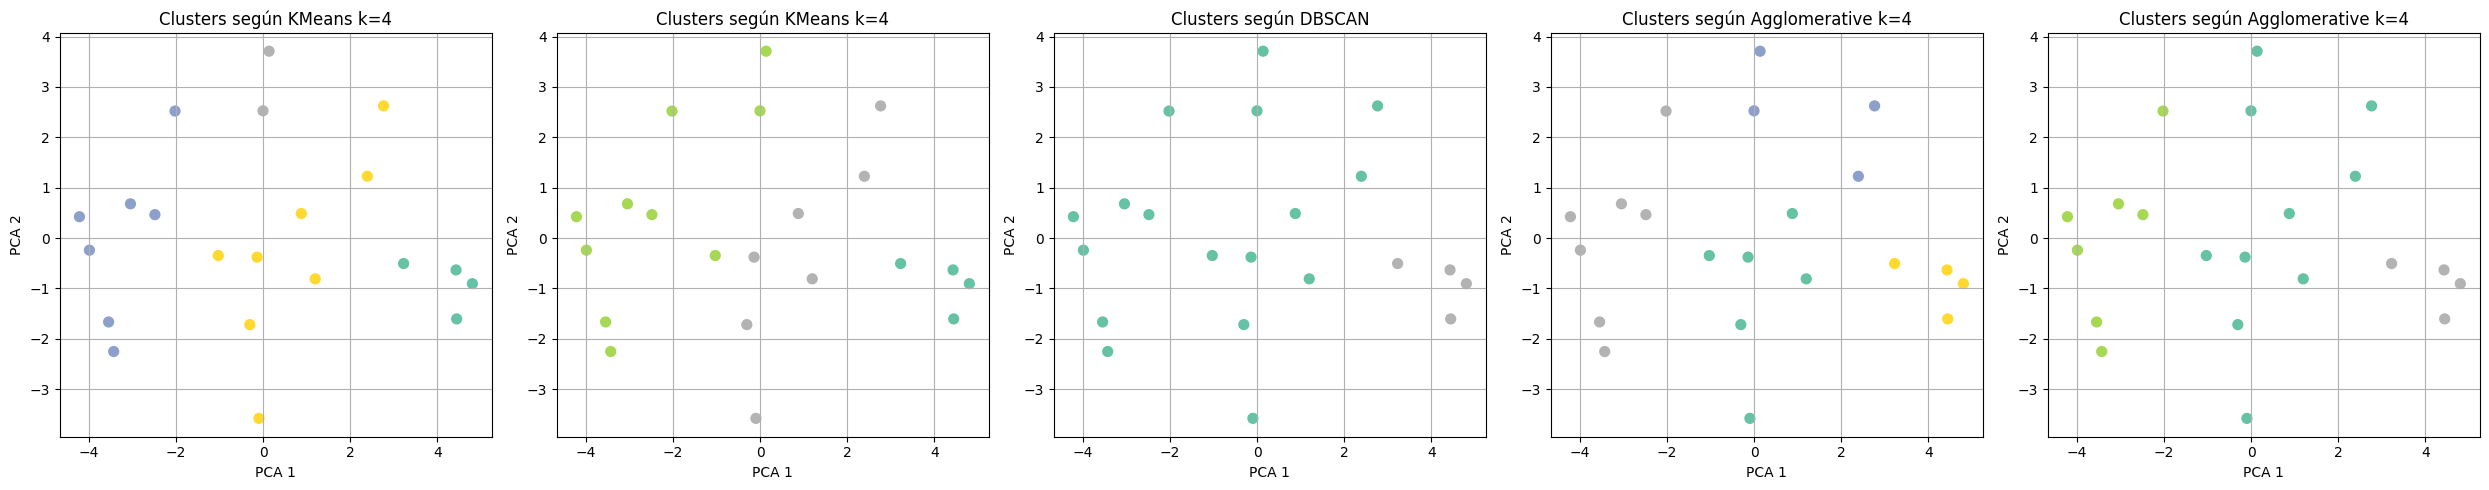

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicamos PCA a los datos normalizados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_distritos)

# Añadimos los componentes al DataFrame de barrios
distritos["PCA1"] = X_pca[:, 0]
distritos["PCA2"] = X_pca[:, 1]

# Visualización de cada modelo
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

modelos = ["cluster_kmeans_4", "cluster_kmeans_3", "cluster_dbscan", "cluster_agglom_4", "cluster_agglom_3"]
titulos = ["KMeans k=4", "KMeans k=4", "DBSCAN", "Agglomerative k=4", "Agglomerative k=4"]

for i, modelo in enumerate(modelos):
    axs[i].scatter(distritos["PCA1"], distritos["PCA2"],
                   c=distritos[modelo], cmap="Set2", s=50)
    axs[i].set_title(f"Clusters según {titulos[i]}")
    axs[i].set_xlabel("PCA 1")
    axs[i].set_ylabel("PCA 2")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

👀 Comparación visual rápida:
KMeans → Clusters bastante bien definidos y compactos. Hay separación clara.

DBSCAN → Caos. Muchos puntos sin asignar o agrupaciones débiles → como sospechábamos, no es útil aquí.

Agglomerative → Muy parecido a KMeans, también con buena separación.

## 🔹 PASO FINAL COMPARATIVO: Calcular Silhouette Score y Calinski Harabasz Score

Esto te da un valor entre -1 y 1 que mide qué tan bien separados están los clusters. Cuanto más alto, mejor.

### 🧩 Celda: calcular silhouette_score por modelo

In [ ]:
from sklearn.metrics import silhouette_score

# Función auxiliar para filtrar los -1 (ruido) en DBSCAN
def score_silhouette(X, etiquetas):
    mask = etiquetas #!= -1
    return silhouette_score(X[mask], etiquetas[mask]) if len(set(etiquetas[mask])) > 1 else -1

# Calculamos silhouette para cada modelo
score_kmeans_4 = silhouette_score(X_distritos, distritos["cluster_kmeans_4"])
score_kmeans_3 = silhouette_score(X_distritos, distritos["cluster_kmeans_3"])
score_dbscan = score_silhouette(X_distritos.values, distritos["cluster_dbscan"].values)
score_agglom_4 = silhouette_score(X_distritos, distritos["cluster_agglom_4"])
score_agglom_3 = silhouette_score(X_distritos, distritos["cluster_agglom_3"])

# Mostramos resultados
print("Silhouette Score KMeans k=4 distritos:    ", round(score_kmeans_4, 25))
print("Silhouette Score KMeans K=3 distritos:    ", round(score_kmeans_4, 25))
print("Silhouette Score DBSCAN distritos:       ", round(score_dbscan, 3))
print("Silhouette Score Agglomerative k=4 distritos:", round(score_agglom_4, 10))
print("Silhouette Score Agglomerative k=3 distritos:", round(score_agglom_4, 10))

Silhouette Score KMeans k=4 distritos:     0.263448487455065
Silhouette Score KMeans K=3 distritos:     0.263448487455065
Silhouette Score DBSCAN distritos:        -1
Silhouette Score Agglomerative k=4 distritos: 0.2646348343
Silhouette Score Agglomerative k=3 distritos: 0.2646348343


### 🧩 Celda: calcular calinski_harabasz_score por modelo

In [ ]:
from sklearn.metrics import calinski_harabasz_score

score_kmeans_4 = calinski_harabasz_score(X_distritos, distritos["cluster_kmeans_4"])
score_kmeans_3 = calinski_harabasz_score(X_distritos, distritos["cluster_kmeans_3"])
score_agglom_4 = calinski_harabasz_score(X_distritos, distritos["cluster_agglom_4"])
score_agglom_3 = calinski_harabasz_score(X_distritos, distritos["cluster_agglom_3"])
# DBSCAN solo si tiene varios clusters válidos (evitar si muchos -1)

print("CHS KMeans k=4 distritos:", score_kmeans_4)
print("CHS KMeans k=3 distritos:", score_kmeans_3)
print("CHS Agglomerative k=4 distritos:", score_agglom_4)
print("CHS Agglomerative k=3 distritos:", score_agglom_3)


CHS KMeans k=4 distritos: 7.581245406048445
CHS KMeans k=3 distritos: 7.160126613340454
CHS Agglomerative k=4 distritos: 8.782024449653152
CHS Agglomerative k=3 distritos: 8.29605333221511


# 🔍 OPCIÓN 1: Ver importancia de cada variable según el centroide de cada cluster

Esto te dice qué tan distinto es el valor medio de cada variable en cada cluster. Es útil para entender qué distingue a los grupos.

/tmp/ipython-input-43-4033725849.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


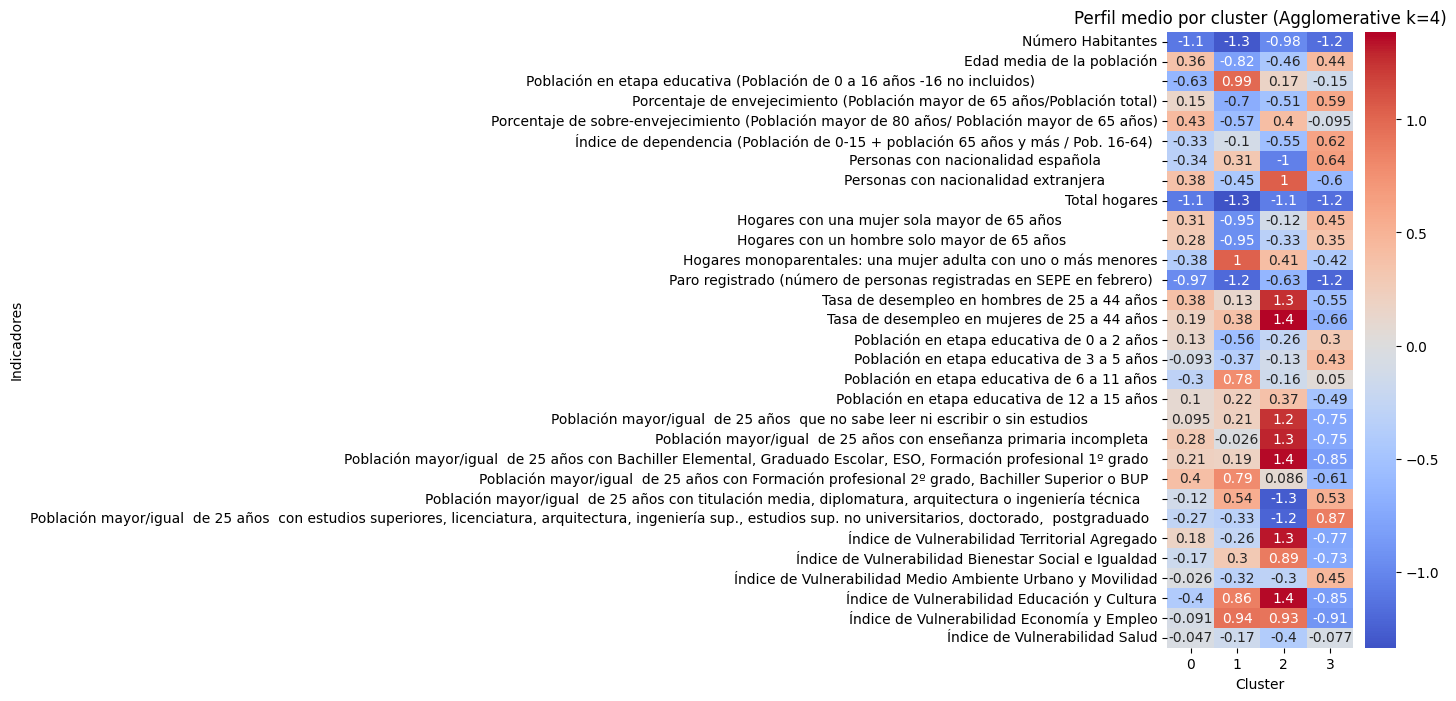

In [ ]:
# Extraemos las etiquetas del modelo Agglomerative
distritos['cluster_agglom_4'] = agg_4.labels_

# Unimos los datos normalizados con las etiquetas
centroides_agg_4 = X_distritos.copy()
centroides_agg_4['cluster'] = distritos['cluster_agglom_4']

# Calculamos la media por cluster
media_por_cluster = centroides_agg_4.groupby('cluster').mean()

# Transponemos para visualización tipo heatmap
centroides_transpuestos_agg_4 = media_por_cluster.T

# Visualización en heatmap (opcional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 8))
sns.heatmap(centroides_transpuestos_agg_4, annot=True, cmap="coolwarm", center=0)
plt.title("Perfil medio por cluster (Agglomerative k=4)")
plt.xlabel("Cluster")
plt.ylabel("Indicadores")
plt.tight_layout()
plt.show()

# Calculamos la varianza entre clusters para cada variable (igual que KMeans)
variabilidad_agg_4 = media_por_cluster.var(axis=0).sort_values(ascending=False)

In [ ]:
# Mostramos el ranking de variables más influyentes
print("Variables que más han influido en el clustering Agglomerative k=4 (por varianza entre centroides):")
display(variabilidad_agg_4.head(15))

Variables que más han influido en el clustering Agglomerative k=4 (por varianza entre centroides):


,0
VARIABLES ESCOGIDAS/ZONA,
Índice de Vulnerabilidad Educación y Cultura,1.086001
"Población mayor/igual de 25 años con Bachiller Elemental, Graduado Escolar, ESO, Formación profesional 1º grado",0.813962
Índice de Vulnerabilidad Territorial Agregado,0.795362
Índice de Vulnerabilidad Economía y Empleo,0.792823
"Población mayor/igual de 25 años con estudios superiores, licenciatura, arquitectura, ingeniería sup., estudios sup. no universitarios, doctorado, postgraduado",0.738245
"Población mayor/igual de 25 años con titulación media, diplomatura, arquitectura o ingeniería técnica",0.726349
Población mayor/igual de 25 años con enseñanza primaria incompleta,0.719742
Tasa de desempleo en mujeres de 25 a 44 años,0.705960
Población mayor/igual de 25 años que no sabe leer ni escribir o sin estudios,0.666225


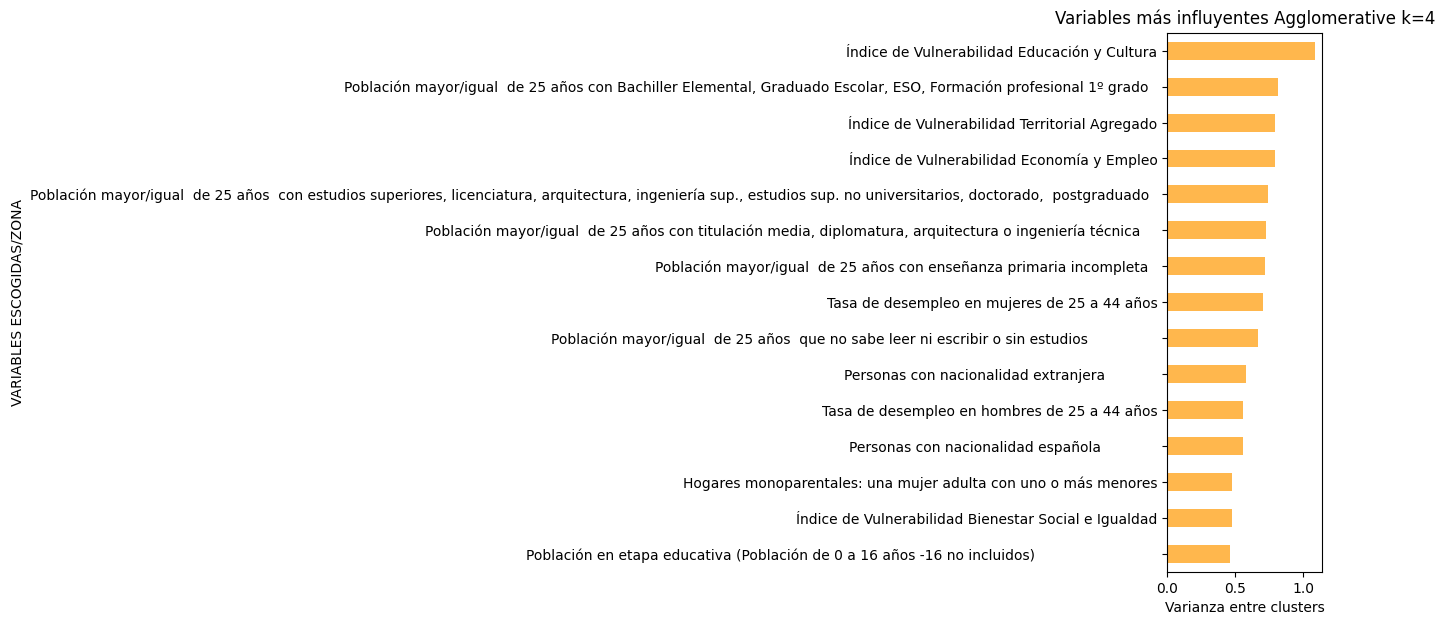

In [ ]:
# (Si quieres gráfico de barras horizontal)
variabilidad_agg_4.head(15).plot(kind='barh', figsize=(2,7), color='#FFB74D')
plt.gca().invert_yaxis()
plt.title("Variables más influyentes Agglomerative k=4")
plt.xlabel("Varianza entre clusters")
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# 1️⃣ Calculamos primero la media por cluster (esto lo tienes seguramente):

# Cogemos el dataset normalizado
df_temp = X_distritos.copy()
df_temp['cluster'] = distritos['cluster_agglom_4'].values  # O el nombre exacto de tu columna de clusters

# Calculamos las medias por cluster
media_por_cluster = df_temp.groupby('cluster').mean()

# 2️⃣ Calculamos la media global de cada variable:
media_global = X_distritos.mean()

# 3️⃣ Calculamos el desplazamiento de cada cluster respecto a la media global:
desplazamiento = media_por_cluster - media_global

# 4️⃣ Ahora generamos un pequeño análisis por cluster:

for cluster_id in media_por_cluster.index:
    print(f"\nVariables más influyentes en el Cluster {cluster_id}:")
    display(desplazamiento.loc[cluster_id].sort_values(ascending=False))

    #print(f"\nVariables menos influyentes en el Cluster {cluster_id}:")
    #print(desplazamiento.loc[cluster_id].sort_values(ascending=True).head(5))


Variables más influyentes en el Cluster 0:


,0
VARIABLES ESCOGIDAS/ZONA,
Porcentaje de sobre-envejecimiento (Población mayor de 80 años/ Población mayor de 65 años),0.374386
Personas con nacionalidad extranjera,0.355973
Edad media de la población,0.355596
Hogares con un hombre solo mayor de 65 años,0.327911
"Población mayor/igual de 25 años con Formación profesional 2º grado, Bachiller Superior o BUP",0.320028
Hogares con una mujer sola mayor de 65 años,0.274890
Población mayor/igual de 25 años con enseñanza primaria incompleta,0.208397
Tasa de desempleo en hombres de 25 a 44 años,0.191498
Índice de Vulnerabilidad Territorial Agregado,0.182605



Variables más influyentes en el Cluster 1:


,1
VARIABLES ESCOGIDAS/ZONA,
Hogares monoparentales: una mujer adulta con uno o más menores,1.001219
Población en etapa educativa (Población de 0 a 16 años -16 no incluidos),0.996933
Índice de Vulnerabilidad Economía y Empleo,0.911970
Índice de Vulnerabilidad Educación y Cultura,0.835679
Población en etapa educativa de 6 a 11 años,0.730301
"Población mayor/igual de 25 años con Formación profesional 2º grado, Bachiller Superior o BUP",0.708225
"Población mayor/igual de 25 años con titulación media, diplomatura, arquitectura o ingeniería técnica",0.540867
Índice de Vulnerabilidad Bienestar Social e Igualdad,0.365441
Personas con nacionalidad española,0.328122



Variables más influyentes en el Cluster 2:


,2
VARIABLES ESCOGIDAS/ZONA,
Índice de Vulnerabilidad Educación y Cultura,1.340753
Índice de Vulnerabilidad Territorial Agregado,1.325425
"Población mayor/igual de 25 años con Bachiller Elemental, Graduado Escolar, ESO, Formación profesional 1º grado",1.286494
Población mayor/igual de 25 años con enseñanza primaria incompleta,1.223782
Tasa de desempleo en mujeres de 25 a 44 años,1.216420
Población mayor/igual de 25 años que no sabe leer ni escribir o sin estudios,1.188782
Tasa de desempleo en hombres de 25 a 44 años,1.067968
Personas con nacionalidad extranjera,1.016997
Índice de Vulnerabilidad Bienestar Social e Igualdad,0.952322



Variables más influyentes en el Cluster 3:


,3
VARIABLES ESCOGIDAS/ZONA,
"Población mayor/igual de 25 años con estudios superiores, licenciatura, arquitectura, ingeniería sup., estudios sup. no universitarios, doctorado, postgraduado",0.953450
Personas con nacionalidad española,0.665271
Índice de dependencia (Población de 0-15 + población 65 años y más / Pob. 16-64),0.627694
Porcentaje de envejecimiento (Población mayor de 65 años/Población total),0.580108
"Población mayor/igual de 25 años con titulación media, diplomatura, arquitectura o ingeniería técnica",0.525559
Edad media de la población,0.432165
Índice de Vulnerabilidad Medio Ambiente Urbano y Movilidad,0.427564
Hogares con una mujer sola mayor de 65 años,0.414771
Población en etapa educativa de 3 a 5 años,0.405953


# MAPA K-MEANS

https://mapshaper.org/

In [ ]:
!pip install geopandas folium branca

In [ ]:
# Cargar el GeoJSON de distritos
jsondistritos = files.upload()

Saving Distritos.json to Distritos.json


In [ ]:
import geopandas as gpd
import pandas as pd
import folium
from branca.colormap import linear
from branca.colormap import LinearColormap


# Cargar el GeoJSON
geo_distritos = gpd.read_file("Distritos.json")

# 🔧 Asignar sistema de coordenadas WGS84 (EPSG:4326)
geo_distritos.set_crs(epsg=4326, inplace=True)

# Asegurarte de que los nombres coinciden
geo_distritos['NOMBRE'] = geo_distritos['NOMBRE'].str.replace(r'\s*-\s*', '-', regex=True).str.upper()
ranking_kmeans_renamed_4 = ranking_kmeans_4.rename(columns={'distrito': 'NOMBRE'})

# Unir los datos
geo_merged_k4 = geo_distritos.merge(ranking_kmeans_renamed_4, on='NOMBRE', how='left')

# Crear mapa base
mk4 = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Definimos colores personalizados de la gama naranja
colors = ['#fdd0a2', '#fdae6b', '#fd8d3c', '#e6550d', '#a63603']

# Definimos el colormap manualmente e invertimos el orden
colormap = LinearColormap(
    colors=list(reversed(colors)),
    vmin=geo_merged_k4['ranking_cluster_kmeans_4'].min(),
    vmax=geo_merged_k4['ranking_cluster_kmeans_4'].max(),
    caption="Categoría de Vulnerabilidad por Distrito (KMeans k=4)"
)

# Tooltip modificado con la categoría
geo_merged_k4['tooltip'] = (
    "<b>" + geo_merged_k4['NOMBRE'].str.title() + "</b><br>" +
    "Categoría de Vulnerabilidad: <b>" + geo_merged_k4['categoria_cluster_kmeans_4'] + "</b>"
)

# Añadir capa GeoJson
folium.GeoJson(
    geo_merged_k4,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['ranking_cluster_kmeans_4']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.75,
    },
    tooltip=folium.GeoJsonTooltip(fields=['tooltip'], labels=False)
).add_to(mk4)

# Añadir leyenda
colormap.add_to(mk4)

# Mostrar mapa
mk4

In [ ]:
mk4.save("mapa_vulnerabilidad_distritos_kmeans_k4.html")

In [ ]:
ranking_kmeans_renamed_3 = ranking_kmeans_3.rename(columns={'distrito': 'NOMBRE'})

# Unir los datos
geo_merged_k3 = geo_distritos.merge(ranking_kmeans_renamed_3, on='NOMBRE', how='left')

# Crear mapa base
mk3 = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Definimos colores personalizados de la gama naranja
colors = ['#fdd0a2', '#fdae6b', '#fd8d3c', '#e6550d', '#a63603']

# Definimos el colormap manualmente e invertimos el orden
colormap = LinearColormap(
    colors=list(reversed(colors)),
    vmin=geo_merged_k3['ranking_cluster_kmeans_3'].min(),
    vmax=geo_merged_k3['ranking_cluster_kmeans_3'].max(),
    caption="Categoría de Vulnerabilidad por Distrito (KMeans k=3)"
)

# Tooltip modificado con la categoría
geo_merged_k3['tooltip'] = (
    "<b>" + geo_merged_k3['NOMBRE'].str.title() + "</b><br>" +
    "Categoría de Vulnerabilidad: <b>" + geo_merged_k3['categoria_cluster_kmeans_3'] + "</b>"
)

# Añadir capa GeoJson
folium.GeoJson(
    geo_merged_k3,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['ranking_cluster_kmeans_3']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.75,
    },
    tooltip=folium.GeoJsonTooltip(fields=['tooltip'], labels=False)
).add_to(mk3)

# Añadir leyenda
colormap.add_to(mk3)

# Mostrar mapa
mk3

In [ ]:
mk3.save("mapa_vulnerabilidad_distritos_kmeans_k3.html")

# MAPA Agglomerative

https://mapshaper.org/

In [ ]:
# Cargar el GeoJSON
geo_distritos = gpd.read_file("Distritos.json")

# 🔧 Asignar sistema de coordenadas WGS84 (EPSG:4326)
geo_distritos.set_crs(epsg=4326, inplace=True)

# Asegurarte de que los nombres coinciden
geo_distritos['NOMBRE'] = geo_distritos['NOMBRE'].str.replace(r'\s*-\s*', '-', regex=True).str.upper()
ranking_agg_renamed_ag_4 = ranking_agglom_4.rename(columns={'distrito': 'NOMBRE'})

# Unir los datos
geo_merged_ag_4 = geo_distritos.merge(ranking_agg_renamed_ag_4, on='NOMBRE', how='left')

# Crear mapa base
magk4 = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Definimos colores personalizados de la gama naranja
colors = ['#fdd0a2', '#fdae6b', '#fd8d3c', '#e6550d', '#a63603']

# Definimos el colormap manualmente e invertimos el orden
colormap = LinearColormap(
    colors=list(reversed(colors)),
    vmin=geo_merged_ag_4['ranking_cluster_agglom_4'].min(),
    vmax=geo_merged_ag_4['ranking_cluster_agglom_4'].max(),
    caption="Categoría de Vulnerabilidad por Distrito (Agglomerative k=4)"
)

# Tooltip modificado con la categoría
geo_merged_ag_4['tooltip'] = (
    "<b>" + geo_merged_ag_4['NOMBRE'].str.title() + "</b><br>" +
    "Categoría de Vulnerabilidad: <b>" + geo_merged_ag_4['categoria_cluster_agglom_4'] + "</b>"
)

# Añadir capa GeoJson
folium.GeoJson(
    geo_merged_ag_4,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['ranking_cluster_agglom_4']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.75,
    },
    tooltip=folium.GeoJsonTooltip(fields=['tooltip'], labels=False)
).add_to(magk4)

# Añadir leyenda
colormap.add_to(magk4)

# Mostrar mapa
magk4

In [ ]:
magk4.save("mapa_vulnerabilidad_distritos_agglomerative_k4.html")

In [ ]:
ranking_agg_renamed_ag_3 = ranking_agglom_3.rename(columns={'distrito': 'NOMBRE'})

# Unir los datos
geo_merged_ag_3 = geo_distritos.merge(ranking_agg_renamed_ag_3, on='NOMBRE', how='left')

# Crear mapa base
magk3 = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Definimos colores personalizados de la gama naranja
colors = ['#fdd0a2', '#fdae6b', '#fd8d3c', '#e6550d', '#a63603']

# Definimos el colormap manualmente e invertimos el orden
colormap = LinearColormap(
    colors=list(reversed(colors)),
    vmin=geo_merged_ag_3['ranking_cluster_agglom_3'].min(),
    vmax=geo_merged_ag_3['ranking_cluster_agglom_3'].max(),
    caption="Categoría de Vulnerabilidad por Distrito (Agglomerative k=3)"
)

# Tooltip modificado con la categoría
geo_merged_ag_3['tooltip'] = (
    "<b>" + geo_merged_ag_3['NOMBRE'].str.title() + "</b><br>" +
    "Categoría de Vulnerabilidad: <b>" + geo_merged_ag_3['categoria_cluster_agglom_3'] + "</b>"
)

# Añadir capa GeoJson
folium.GeoJson(
    geo_merged_ag_3,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['ranking_cluster_agglom_3']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.75,
    },
    tooltip=folium.GeoJsonTooltip(fields=['tooltip'], labels=False)
).add_to(magk3)

# Añadir leyenda
colormap.add_to(magk3)

# Mostrar mapa
magk3

In [ ]:
magk3.save("mapa_vulnerabilidad_distritos_agglomerative_k3.html")

# MAPA DBSCAN

In [ ]:
import geopandas as gpd
import pandas as pd
import folium
from branca.colormap import linear

# Cargar el GeoJSON
geo_distritos = gpd.read_file("Distritos.json")

# Asignar sistema de coordenadas WGS84 (por si no lo tiene)
geo_distritos.set_crs(epsg=4326, inplace=True)

# Asegurarte de que los nombres coinciden
geo_distritos['NOMBRE'] = geo_distritos['NOMBRE'].str.replace(r'\s*-\s*', '-', regex=True).str.upper()

# Adaptar tu dataframe de rankings (aquí adaptas si lo necesitas)
ranking_dbscan_renamed = ranking_dbscan.rename(columns={'distrito': 'NOMBRE'})

# Unir los datos espaciales con los rankings
geo_merged = geo_distritos.merge(ranking_dbscan_renamed, on='NOMBRE', how='left')

# Eliminar filas sin ranking (si lo quieres hacer estricto)
# geo_merged = geo_merged.dropna(subset=['ranking_cluster_dbscan'])

# O bien: calcular min y max ignorando NaN
min_val = geo_merged['ranking_cluster_dbscan'].dropna().min()
max_val = geo_merged['ranking_cluster_dbscan'].dropna().max()

# Crear mapa base
mdbscan = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Definimos colores personalizados de la gama naranja
colors = ['#fdd0a2', '#fdae6b', '#fd8d3c', '#e6550d', '#a63603']

# Definimos el colormap manualmente e invertimos el orden
colormap = LinearColormap(
    colors=list(reversed(colors)),
    vmin=geo_merged['ranking_cluster_dbscan'].min(),
    vmax=geo_merged['ranking_cluster_dbscan'].max(),
    caption="Categoría de Vulnerabilidad por Distrito (DBSCAN)"
)

# Tooltip modificado con la categoría
geo_merged['tooltip'] = (
    "<b>" + geo_merged['NOMBRE'].str.title() + "</b><br>" +
    "Categoría de Vulnerabilidad: <b>" + geo_merged['categoria_cluster_dbscan'] + "</b>"
)

# Añadir capa GeoJSON al mapa
folium.GeoJson(
    geo_merged,
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['ranking_cluster_dbscan'])
        if feature['properties']['ranking_cluster_dbscan'] is not None else 'lightgrey',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.75,
    },
    tooltip=folium.GeoJsonTooltip(fields=['tooltip'], labels=False)
).add_to(mdbscan)

# Añadir leyenda al mapa
colormap.add_to(mdbscan)

# Mostrar mapa
mdbscan

In [ ]:
mdbscan.save("mapa_vulnerabilidad_distritos_dbscan.html")